# I.Imporation des libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from imblearn.over_sampling import SMOTENC
from collections import Counter

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, roc_curve
from sklearn.model_selection import learning_curve
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

%matplotlib inline

In [68]:
df=pd.read_excel('data_cars.xlsx')
print(df)

      Unnamed: 0                      Car  Price  Comfort  Performance  \
0              0           2024 Acura MDX  51045      4.6          4.3   
1              2           2023 Acura RDX  42945      4.3          4.3   
2              3           2023 Acura MDX  50745      4.6          4.3   
3              4           2023 Acura TLX  41245      4.4          4.5   
4              6           2022 Acura RDX  41795      4.3          4.3   
...          ...                      ...    ...      ...          ...   
9708         273     1992 Volkswagen Golf   2165      4.5          4.6   
9709         274   1992 Volkswagen Passat   2172      4.4          4.1   
9710         275      1992 Volkswagen Fox   2530      4.3          4.4   
9711         276      1992 Volkswagen GTI   2789      4.5          4.7   
9712         277  1992 Volkswagen Corrado   4507      4.8          4.9   

      Quality  Value  Reliability  Styling integrated_garage_door_opener  ...  \
0         4.4    4.3          

In [69]:
# Calcul de la moyenne et l'ecart-type
mean_Price = df['Price'].mean()
std_Price = df['Price'].std()
# Calcul des  Z-scores 
z_scores_Price = np.abs((df['Price'] - mean_Price) / std_Price)
z_scores_Price
# detection des outliers
outliers_Price = df[z_scores_Price > 3.5]

outlier_limit=outliers_Price['Price'].min()
print(outliers_Price['Price'])

8       171495
12      175521
20      166085
28      155979
36      149718
         ...  
7695    117935
7742    124275
7765    109996
7793     88134
7844     92730
Name: Price, Length: 111, dtype: int64


In [70]:
df = df[df['Price'] < outlier_limit]

In [71]:
conditions = [(df['Price'] > 14600) & (df['Comfort'] <= 3.5) & (df['Quality'] <= 3.5) & (df['Value'] <= 3.5) & (df['Reliability'] <= 3.5) & (df['Styling'] <= 3.5),((df['Price'] >= 14600) & (df['Comfort'] > 3.5) & (df['Quality'] > 3.5) & (df['Value'] > 3.5) & (df['Reliability'] > 3.5) & (df['Styling'] > 3.5))]


values = [0, 1]

df['Target'] = np.select(conditions, values)

In [113]:
df.to_excel("data_cars2.xlsx",
             sheet_name='Sheet_name_1') 

In [72]:
df2=df.drop(['Car','Unnamed: 0','Comfort','Performance','Quality','Value','Reliability','Styling','integrated_garage_door_opener','Drivetrain','led_headlights','Model','max_miles_warrantly'],axis=1)
df2

,Price,max_seating_capacity,alloy_wheels,nb_doors,Engine,max_years_warrantly,max_years_powertrain,max_miles_powertrain,trunk_cap_categ,Year,Brand,Target
0,51045,7,Available,4,V6,4,6,70000,Very Spacious,2024,Acura,1
1,42945,5,Available,4,4-Cyl,4,6,70000,Spacious,2023,Acura,1
2,50745,7,Available,4,V6,4,6,70000,Very Spacious,2023,Acura,1
3,41245,5,Available,4,4-Cyl,4,6,70000,Moderate,2023,Acura,1
4,41795,5,Available,4,4-Cyl,4,6,70000,Spacious,2022,Acura,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9708,2165,5,Available,2,4-Cyl,2,5,50000,Moderate,1992,Volkswagen,0
9709,2172,5,Available,4,4-Cyl,2,5,50000,Moderate,1992,Volkswagen,0
9710,2530,4,Available,2,4-Cyl,2,5,50000,Small,1992,Volkswagen,0
9711,2789,5,Available,2,4-Cyl,2,5,50000,Moderate,1992,Volkswagen,0


In [73]:
# Mapping for transforming values
mapping = {'Not Available': 0, 'Available': 1}


# Applying the mapping to the 'alloy_wheels' column
    
df2['alloy_wheels'] = df2['alloy_wheels'].map(mapping)


df2['alloy_wheels']

0       1
1       1
2       1
3       1
4       1
       ..
9708    1
9709    1
9710    1
9711    1
9712    1
Name: alloy_wheels, Length: 9602, dtype: int64

In [74]:
# Mapping for transforming values
mapping = {'Very Small': 0, 'Small': 1, 'Moderate': 2, 'Spacious': 3, 'Very Spacious': 4}
# Applying the mapping to the 'alloy_wheels' column
df2['trunk_cap_categ'] = df2['trunk_cap_categ'].map(mapping)

df2['trunk_cap_categ']

0       4
1       3
2       4
3       2
4       3
       ..
9708    2
9709    2
9710    1
9711    2
9712    2
Name: trunk_cap_categ, Length: 9602, dtype: int64

In [75]:
#OneHot Encoding
categorical_features =[feature for feature in df2.columns if df2[feature].dtypes == 'object']
df2 = pd.get_dummies(df2, columns=categorical_features,drop_first=True)
print("This Dataframe has {} rows and {} columns after encoding".format(df2.shape[0], df2.shape[1]))



This Dataframe has 9602 rows and 68 columns after encoding


In [76]:
X=df2.drop(['Target'], axis=1)
y= df2['Target']

In [77]:


# Sélectionner les caractéristiques numériques
numeric_features = ['Price', 'max_seating_capacity', 'max_years_warrantly', 'max_years_powertrain', 'max_miles_powertrain', 'trunk_cap_categ', 'Year','nb_doors']

# Créer un DataFrame contenant uniquement les caractéristiques numériques
numeric_data = X[numeric_features]

# Initialiser le StandardScaler
scaler = MinMaxScaler()

# Appliquer le Standard Scaling aux caractéristiques numériques
scaled_data = scaler.fit_transform(numeric_data)

# Remplacer les caractéristiques numériques dans le DataFrame original par les données mises à l'échelle
X[numeric_features] = scaled_data
X

,Price,max_seating_capacity,alloy_wheels,nb_doors,max_years_warrantly,max_years_powertrain,max_miles_powertrain,trunk_cap_categ,Year,Engine_4-CYL,...,Brand_Panoz,Brand_Plymouth,Brand_Polestar,Brand_Pontiac,Brand_Saab,Brand_Subaru,Brand_Suzuki,Brand_Toyota,Brand_Volkswagen,Brand_smart
0,0.574135,0.466667,1,0.666667,0.4,0.500,0.428571,1.00,1.00000,0,...,0,0,0,0,0,0,0,0,0,0
1,0.480271,0.333333,1,0.666667,0.4,0.500,0.428571,0.75,0.96875,0,...,0,0,0,0,0,0,0,0,0,0
2,0.570659,0.466667,1,0.666667,0.4,0.500,0.428571,1.00,0.96875,0,...,0,0,0,0,0,0,0,0,0,0
3,0.460571,0.333333,1,0.666667,0.4,0.500,0.428571,0.50,0.96875,0,...,0,0,0,0,0,0,0,0,0,0
4,0.466945,0.333333,1,0.666667,0.4,0.500,0.428571,0.75,0.93750,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9708,0.007706,0.333333,1,0.000000,0.0,0.375,0.285714,0.50,0.00000,0,...,0,0,0,0,0,0,0,0,1,0
9709,0.007787,0.333333,1,0.666667,0.0,0.375,0.285714,0.50,0.00000,0,...,0,0,0,0,0,0,0,0,1,0
9710,0.011936,0.266667,1,0.000000,0.0,0.375,0.285714,0.25,0.00000,0,...,0,0,0,0,0,0,0,0,1,0
9711,0.014937,0.333333,1,0.000000,0.0,0.375,0.285714,0.50,0.00000,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2) 
X_train.head()

,Price,max_seating_capacity,alloy_wheels,nb_doors,max_years_warrantly,max_years_powertrain,max_miles_powertrain,trunk_cap_categ,Year,Engine_4-CYL,...,Brand_Panoz,Brand_Plymouth,Brand_Polestar,Brand_Pontiac,Brand_Saab,Brand_Subaru,Brand_Suzuki,Brand_Toyota,Brand_Volkswagen,Brand_smart
7476,0.041625,0.266667,1,0.000000,0.4,0.250,0.285714,0.75,0.40625,0,...,0,0,0,0,0,0,0,0,0,0
7243,0.023072,0.333333,1,0.666667,0.4,0.250,0.285714,0.50,0.06250,0,...,0,0,0,0,0,0,0,0,0,0
1827,0.094687,0.400000,0,0.666667,0.2,0.375,0.642857,1.00,0.56250,0,...,0,0,0,0,0,0,0,0,0,0
6469,0.254279,0.333333,1,0.666667,0.2,0.375,0.357143,0.50,0.90625,0,...,0,0,0,0,0,0,0,0,0,0
4709,0.093922,0.200000,1,0.000000,0.2,0.125,0.185714,1.00,0.31250,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7681 entries, 7476 to 396
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 7681 non-null   float64
 1   max_seating_capacity  7681 non-null   float64
 2   alloy_wheels          7681 non-null   int64  
 3   nb_doors              7681 non-null   float64
 4   max_years_warrantly   7681 non-null   float64
 5   max_years_powertrain  7681 non-null   float64
 6   max_miles_powertrain  7681 non-null   float64
 7   trunk_cap_categ       7681 non-null   float64
 8   Year                  7681 non-null   float64
 9   Engine_4-CYL          7681 non-null   uint8  
 10  Engine_4-Cyl          7681 non-null   uint8  
 11  Engine_4Cyl           7681 non-null   uint8  
 12  Engine_5-Cyl          7681 non-null   uint8  
 13  Engine_6-Cyl          7681 non-null   uint8  
 14  Engine_AC             7681 non-null   uint8  
 15  Engine_Dual        

In [14]:

extra_indices=[2,7]
# Liste des noms de colonnes catégoriques
categorical_columns = df2.select_dtypes(include=['uint8']).columns.tolist()

# Indices des colonnes catégoriques dans le DataFrame
categorical_indices = np.where(df2.columns.isin(categorical_columns))[0].tolist()
categorical_indices=extra_indices+ categorical_indices[:-1]

# Afficher les indices des colonnes catégoriques
print(categorical_indices)

[2, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


In [15]:
# Instantiate the SMOTENC object
smotenc = SMOTENC(categorical_features=categorical_indices, random_state=42)

# Fit and transform the data using SMOTENC
X_train_resampled, y_train_resampled = smotenc.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_resampled).items()))

[(0, 5303), (1, 5303)]


## Modélisation

In [16]:
# Define and compile model
model = keras.Sequential()
model.add(Dense(64 , input_shape=(67,) , activation="relu" , name="Hidden_Layer_1"))
model.add(Dense(32 , activation="relu" , name="Hidden_Layer_2"))
model.add(Dense(1 , activation="sigmoid" , name="Output_Layer"))
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile( optimizer=opt, loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_Layer_1 (Dense)       (None, 64)                4352      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 32)                2080      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 33        
Total params: 6,465
Trainable params: 6,465
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(X_train)
# fit model
history_org = model.fit(
    X_train, 
    y_train, 
    batch_size=32, 
    epochs=100, verbose=2, 
    callbacks=None, 
    validation_data=(X_test,y_test), 
    shuffle=True, 
    class_weight=None, 
    sample_weight=None, 
    initial_epoch=0)

         Price  max_seating_capacity  alloy_wheels  nb_doors  \
1052  0.185156              0.333333             1  0.666667   
66    0.131108              0.333333             1  0.666667   
4664  0.039689              0.000000             1  0.000000   
9464  0.273701              0.333333             1  0.666667   
172   0.010383              0.333333             1  0.666667   
...        ...                   ...           ...       ...   
3236  0.539892              0.333333             1  0.333333   
4809  0.032041              0.133333             1  0.333333   
6876  0.253213              0.333333             1  0.666667   
8691  0.030639              0.266667             1  0.000000   
403   0.184877              0.333333             1  0.666667   

      max_years_warrantly  max_years_powertrain  max_miles_powertrain  \
1052                  0.4                 0.500              0.428571   
66                    0.4                 0.500              0.428571   
4664        

Epoch 40/100
241/241 - 0s - loss: 0.0578 - accuracy: 0.9754 - val_loss: 0.0639 - val_accuracy: 0.9818
Epoch 41/100
241/241 - 0s - loss: 0.0544 - accuracy: 0.9783 - val_loss: 0.0713 - val_accuracy: 0.9781
Epoch 42/100
241/241 - 0s - loss: 0.0498 - accuracy: 0.9792 - val_loss: 0.0900 - val_accuracy: 0.9682
Epoch 43/100
241/241 - 0s - loss: 0.0489 - accuracy: 0.9805 - val_loss: 0.0851 - val_accuracy: 0.9656
Epoch 44/100
241/241 - 0s - loss: 0.0466 - accuracy: 0.9800 - val_loss: 0.1043 - val_accuracy: 0.9708
Epoch 45/100
241/241 - 0s - loss: 0.0502 - accuracy: 0.9796 - val_loss: 0.0731 - val_accuracy: 0.9766
Epoch 46/100
241/241 - 0s - loss: 0.0436 - accuracy: 0.9824 - val_loss: 0.0862 - val_accuracy: 0.9714
Epoch 47/100
241/241 - 0s - loss: 0.0496 - accuracy: 0.9801 - val_loss: 0.0771 - val_accuracy: 0.9703
Epoch 48/100
241/241 - 0s - loss: 0.0455 - accuracy: 0.9816 - val_loss: 0.0871 - val_accuracy: 0.9703
Epoch 49/100
241/241 - 0s - loss: 0.0493 - accuracy: 0.9803 - val_loss: 0.0809 - v

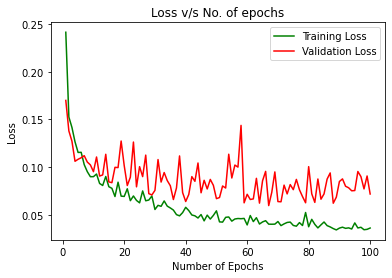

In [18]:
loss = history_org.history['loss']
val_loss = history_org.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

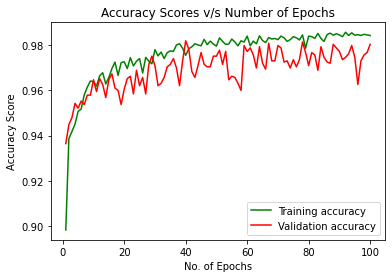

In [19]:
loss = history_org.history['accuracy']
val_loss = history_org.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy of Deep neural Network : %.2f' % (accuracy*100))

61/61 [==============================] - 0s 458us/step - loss: 0.0718 - accuracy: 0.9802
Accuracy of Deep neural Network : 98.02


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

def ConfusionMatrix(y_pred, y_test):
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Mauvaise affaire','Bonne affaire']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


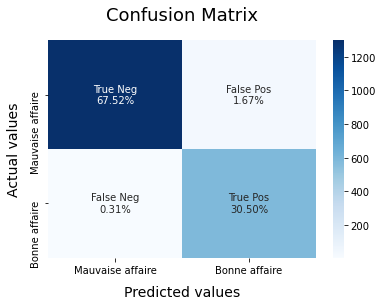

In [22]:
# Predicting on the Test dataset.
y_pred = model.predict(X_test)

# Converting prediction to reflect the sentiment predicted.
y_pred = np.where(y_pred>=0.5, 1, 0)

# Printing out the Evaluation metrics. 
ConfusionMatrix(y_pred, y_test)

In [23]:
def model_builder(hp):
    model = keras.Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(67,)))
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',[1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [24]:
from keras_tuner.tuners import RandomSearch
# Define hyperparameters
units = [32, 64, 128, 256, 512]
num_layers = [1, 2, 3, 4, 5]
learning_rate = [1e-2, 1e-3, 1e-4]

# Define tuner
tuner = RandomSearch(model_builder, objective='val_accuracy', max_trials=3, executions_per_trial=1, directory='tirals_dl', project_name='DL_trials', overwrite=True)


In [25]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [26]:
# Perform hyperparameter search
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Trial 3 Complete [00h 00m 58s]
val_accuracy: 0.9796980619430542

Best val_accuracy So Far: 0.9828214645385742
Total elapsed time: 00h 02m 11s
INFO:tensorflow:Oracle triggered exit


In [27]:
tuner.results_summary()

Results summary
Results in tirals_dl\DL_trials
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
units: 320
num_layers: 3
units_0: 384
learning_rate: 0.001
units_1: 352
units_2: 224
units_3: 224
Score: 0.9828214645385742

Trial 0 summary
Hyperparameters:
units: 416
num_layers: 4
units_0: 384
learning_rate: 0.0001
units_1: 32
units_2: 32
units_3: 32
Score: 0.9796980619430542

Trial 2 summary
Hyperparameters:
units: 384
num_layers: 4
units_0: 256
learning_rate: 0.0001
units_1: 416
units_2: 320
units_3: 256
Score: 0.9796980619430542


In [28]:
modified_model = tuner.get_best_models(num_models=1)[0]
modified_hparam=tuner.get_best_hyperparameters(num_trials=1)[0]
tuner.get_best_hyperparameters()[0].values

{'units': 320,
 'num_layers': 3,
 'units_0': 384,
 'learning_rate': 0.001,
 'units_1': 352,
 'units_2': 224,
 'units_3': 224}

In [29]:
loss, accuracy = modified_model.evaluate(X_test, y_test)

61/61 [==============================] - 0s 755us/step - loss: 0.0669 - accuracy: 0.9828


In [30]:
model = tuner.hypermodel.build(modified_hparam)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test,y_test))
val_per_epoch = history.history['val_accuracy']
modified_epoch = val_per_epoch.index(max(val_per_epoch)) + 1
print('Best epoch value: %d' % (modified_epoch,))

Epoch 1/100
241/241 [==============================] - 1s 3ms/step - loss: 0.2424 - accuracy: 0.8979 - val_loss: 0.2497 - val_accuracy: 0.9068
Epoch 2/100
241/241 [==============================] - 0s 2ms/step - loss: 0.1704 - accuracy: 0.9298 - val_loss: 0.1337 - val_accuracy: 0.9448
Epoch 3/100
241/241 [==============================] - 1s 2ms/step - loss: 0.1340 - accuracy: 0.9460 - val_loss: 0.1231 - val_accuracy: 0.9531
Epoch 4/100
241/241 [==============================] - 1s 2ms/step - loss: 0.1203 - accuracy: 0.9510 - val_loss: 0.1475 - val_accuracy: 0.9365
Epoch 5/100
241/241 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9397 - val_loss: 0.1360 - val_accuracy: 0.9453
Epoch 6/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9634 - val_loss: 0.1262 - val_accuracy: 0.9490
Epoch 7/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0861 - accuracy: 0.9651 - val_loss: 0.1050 - val_accuracy: 0.9558

Epoch 58/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9839 - val_loss: 0.0769 - val_accuracy: 0.9750
Epoch 59/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9827 - val_loss: 0.0775 - val_accuracy: 0.9771
Epoch 60/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9855 - val_loss: 0.0865 - val_accuracy: 0.9714
Epoch 61/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9833 - val_loss: 0.0847 - val_accuracy: 0.9698
Epoch 62/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9832 - val_loss: 0.0808 - val_accuracy: 0.9771
Epoch 63/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9835 - val_loss: 0.0692 - val_accuracy: 0.9761
Epoch 64/100
241/241 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9839 - val_loss: 0.0827 - val_accuracy:

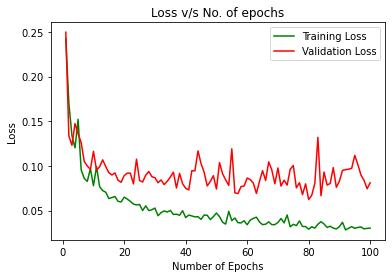

In [31]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss v/s No. of epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

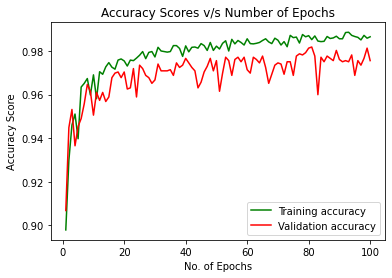

In [32]:
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
plt.plot(epochs, loss, 'g', label = 'Training accuracy')
plt.plot(epochs, val_loss, 'r', label = 'Validation accuracy')
plt.title('Accuracy Scores v/s Number of Epochs')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

In [33]:
hypermodel = tuner.hypermodel.build(modified_hparam)

In [34]:
hypermodel.fit(X_train, y_train, batch_size=32, epochs=modified_epoch, validation_data=(X_test, y_test), initial_epoch=0)

Epoch 1/81
241/241 [==============================] - 1s 2ms/step - loss: 0.2471 - accuracy: 0.8962 - val_loss: 0.1551 - val_accuracy: 0.9360
Epoch 2/81
241/241 [==============================] - 0s 2ms/step - loss: 0.1622 - accuracy: 0.9356 - val_loss: 0.1369 - val_accuracy: 0.9500
Epoch 3/81
241/241 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9462 - val_loss: 0.1539 - val_accuracy: 0.9401
Epoch 4/81
241/241 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9542 - val_loss: 0.1326 - val_accuracy: 0.9479
Epoch 5/81
241/241 [==============================] - 0s 2ms/step - loss: 0.1015 - accuracy: 0.9564 - val_loss: 0.1268 - val_accuracy: 0.9500
Epoch 6/81
241/241 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9596 - val_loss: 0.1158 - val_accuracy: 0.9485
Epoch 7/81
241/241 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.9637 - val_loss: 0.1520 - val_accuracy: 0.9422
Epoch 

In [35]:
hypermodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 320)               21760     
_________________________________________________________________
dense_11 (Dense)             (None, 384)               123264    
_________________________________________________________________
dense_12 (Dense)             (None, 352)               135520    
_________________________________________________________________
dense_13 (Dense)             (None, 224)               79072     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 225       
Total params: 359,841
Trainable params: 359,841
Non-trainable params: 0
_________________________________________________________________


In [36]:
result_final = hypermodel.evaluate(X_test, y_test, batch_size=32)
print("[Loss, Accuracy]:", result_final)

61/61 [==============================] - 0s 771us/step - loss: 0.0832 - accuracy: 0.9755
[Loss, Accuracy]: [0.08322960138320923, 0.9755336046218872]


In [37]:
#save the model 
model.save("my_classifier.h5")

In [38]:
#load the saved model
loaded_model = tf.keras.models.load_model("my_classifier.h5")

In [93]:
print(loaded_model.predict(X_test[:5]), y_test[:5])

[[2.5867159e-24]
 [9.9754727e-01]
 [1.6564640e-21]
 [1.3416764e-05]
 [1.0000000e+00]] 5711    0
9231    1
3878    0
852     0
7893    1
Name: Target, dtype: int32


In [114]:
df2=df.drop(['Car','Unnamed: 0','Comfort','Performance','Quality','Value','Reliability','Styling','integrated_garage_door_opener','Drivetrain','led_headlights','Model','max_miles_warrantly'],axis=1)

new_data = [[51045, 7,'Available' , 4, 'V6',4,6,70000,'Very Spacious',2024,'Acura']]

new_data = pd.DataFrame(new_data, columns=['Price','max_seating_capacity','alloy_wheels','nb_doors','Engine','max_years_warrantly','max_years_powertrain','max_miles_powertrain','trunk_cap_categ','Year','Brand'])
df2 = df2.append(new_data, ignore_index=True)
df2=df2.fillna(0)
print(df2)
df2=df2.drop(['Target'], axis=1)
# Mapping for transforming values
mapping = {'Not Available': 0, 'Available': 1}


# Applying the mapping to the 'alloy_wheels' column
    
df2['alloy_wheels'] = df2['alloy_wheels'].map(mapping)


df2['alloy_wheels']

print(new_data['alloy_wheels'])
# Mapping for transforming values
mapping = {
    'Very Small': 0,
    'Small': 1,
    'Moderate': 2,
    'Spacious': 3,
    'Very Spacious': 4
              }

# Appliquez la correspondance à la colonne 'trunk_cap_categ'
df2['trunk_cap_categ'] = df2['trunk_cap_categ'].replace(mapping)


categorical_features =[feature for feature in df2.columns if df2[feature].dtypes == 'object']
print(categorical_features)
df2 = pd.get_dummies(df2, columns=categorical_features,drop_first=True)
print(new_data)
# Sélectionner les caractéristiques numériques
numeric_features = ['Price', 'max_seating_capacity', 'max_years_warrantly', 'max_years_powertrain', 'max_miles_powertrain', 'trunk_cap_categ', 'Year','nb_doors']

# Créer un DataFrame contenant uniquement les caractéristiques numériques


numeric_data = df2[numeric_features]
# Initialiser le StandardScaler
scaler = MinMaxScaler()

# Appliquer le Standard Scaling aux caractéristiques numériques
scaled_data = scaler.fit_transform(numeric_data)

# Remplacer les caractéristiques numériques dans le DataFrame original par les données mises à l'échelle
df2[numeric_features] = scaled_data

x=df2.iloc[-1]
print(x.shape)
x = x.values.reshape(1, -1)
# Faire une prédiction sur les nouvelles données
prediction = loaded_model.predict(x)

print(prediction[0])
# Interpréter la prédiction
if prediction[0]>= 0.8:
    print("Bonne affaire")
else:
    print("Mauvaise affaire")


      Price  max_seating_capacity alloy_wheels  nb_doors Engine  \
0     51045                     7    Available         4     V6   
1     42945                     5    Available         4  4-Cyl   
2     50745                     7    Available         4     V6   
3     41245                     5    Available         4  4-Cyl   
4     41795                     5    Available         4  4-Cyl   
...     ...                   ...          ...       ...    ...   
9598   2172                     5    Available         4  4-Cyl   
9599   2530                     4    Available         2  4-Cyl   
9600   2789                     5    Available         2  4-Cyl   
9601   4507                     4    Available         2  4-Cyl   
9602  51045                     7    Available         4     V6   

      max_years_warrantly  max_years_powertrain  max_miles_powertrain  \
0                       4                     6                 70000   
1                       4                     6  